In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

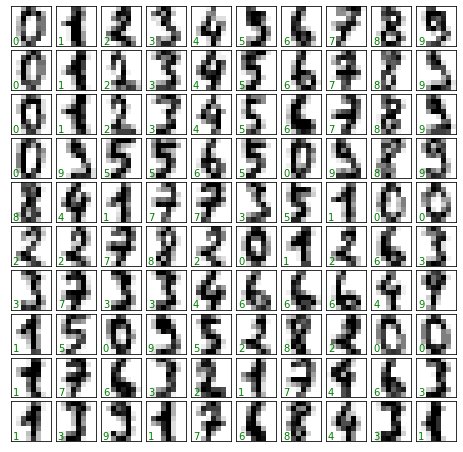

In [12]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(10,10,figsize=(8,8),
                              subplot_kw={'xticks':[],'yticks':[]},
                              gridspec_kw = dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')            
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [13]:
X = digits.data
X.shape

(1797, 64)

In [15]:
y = digits.target
y.shape

(1797,)

In [16]:
#dimensiolity reduction 64 to 2 dim
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_project = iso.transform(digits.data)

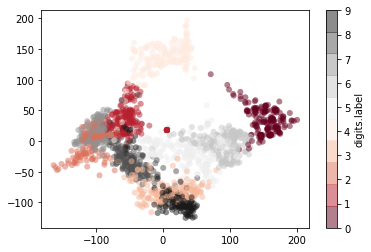

In [24]:
plt.scatter(data_project[:,0],data_project[:,1],c=y,
           edgecolors='none',alpha=0.5,
            cmap=plt.cm.get_cmap('RdGy',10)
           )
plt.colorbar(label='digits.label',ticks=range(10))

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [28]:
from sklearn.metrics import accuracy_score        
accuracy_score(ytest, y_model)

0.8333333333333334

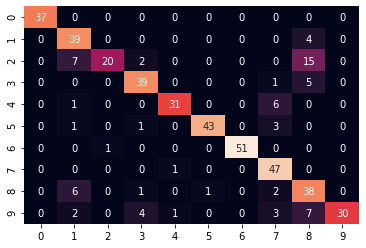

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest , y_model)
sns.heatmap(mat,annot=True,cbar=False)

In [32]:
#Hyperparameter tuning
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [33]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,train_size=0.5, random_state=0)

In [36]:
y2M=model.fit(Xtrain,ytrain).predict(Xtest)
y1M = model.fit(Xtest,ytest).predict(Xtrain)
accuracy_score(ytest,y2M),accuracy_score(ytrain,y1M)


(0.9466666666666667, 0.9733333333333334)

In [38]:
from sklearn.model_selection import cross_val_score       
cross_val_score(model, x, y, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [43]:
from sklearn.model_selection import LeaveOneOut       
scores = cross_val_score(model, x, y, cv=LeaveOneOut())      
scores.shape

(150,)

In [82]:
from sklearn.preprocessing import PolynomialFeatures        
from sklearn.linear_model import LinearRegression        
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))


In [83]:
import numpy as np
def make_data(N, err=1.0, rseed=1):            # randomly sample the data            
    rng = np.random.RandomState(rseed)            
    X = rng.rand(N, 1) ** 2            
    y = 10 - 1. / (X.ravel() + 0.1)            
    if err > 0:                
        y += err * rng.randn(N)            
        return X, y
X, y = make_data(40)

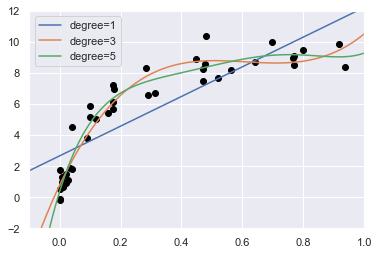

In [90]:
import matplotlib.pyplot as plt        
import seaborn;
seaborn.set()  # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')        
axis = plt.axis()        
for degree in [1, 3, 5]:            
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)            
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))        
    plt.xlim(-0.1, 1.0)        
    plt.ylim(-2, 12)        
    plt.legend(loc='best');

(0, 1)

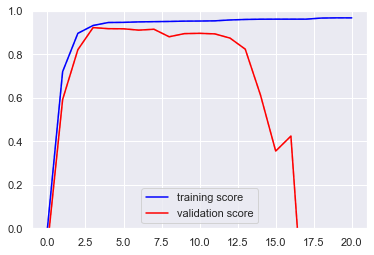

In [99]:
import numpy as np
degree = np.arange(21) 
train_score2, val_score2 = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score') 
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,linestyle='dashed') 
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed') 
plt.legend(loc='lower center') 
plt.ylim(0, 1)

Text(0, 0.5, 'score')

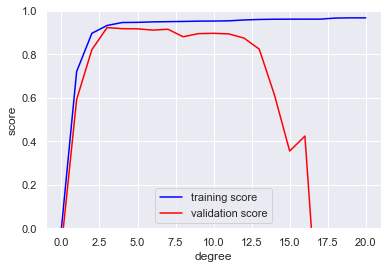

In [100]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21) 
train_score, val_score = validation_curve(PolynomialRegression(), X,y,'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')